## Plot Density Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [10]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [11]:
output_filename = f"{data_dir}{os.sep}density_mat_N6_D4_M3.txt"

In [45]:
def read_density_mat_file(output_filename):
    with open(output_filename) as f:
        data = f.readlines()

    dim_rho = int(data[0].split("=")[1].strip("\n"))
    print(dim_rho)

    # extract density matrix
    rho = np.zeros((dim_rho, dim_rho), dtype=complex)
    idx = 2
    for i, row_idx in enumerate(range(idx, idx + dim_rho)):
        row_i = [x.strip(')').strip('(').split(',') for x in data[row_idx].split()]
        rho[i] = np.array([complex(float(a[0]), float(a[1])) for a in row_i], dtype=complex)

    dim_rho_reduced_L = int(data[idx + dim_rho].split("=")[1].strip("\n"))
    idx += dim_rho + 2
    print(dim_rho_reduced_L)

    # extract left reduced density matrix
    rho_reduced_L = np.zeros((dim_rho_reduced_L, dim_rho_reduced_L), dtype=complex)
    for i, row_idx in enumerate(range(idx, idx + dim_rho_reduced_L)):
        row_i = [x.strip(')').strip('(').split(',') for x in data[row_idx].split()]
        rho_reduced_L[i] = np.array([complex(float(a[0]), float(a[1])) for a in row_i], dtype=complex)

    dim_rho_reduced_R = int(data[idx + dim_rho_reduced_L].split("=")[1].strip("\n"))
    idx += 2 + dim_rho_reduced_L
    print(dim_rho_reduced_R)

    # extract right reduced density matrix
    rho_reduced_R = np.zeros((dim_rho_reduced_R, dim_rho_reduced_R), dtype=complex)
    for i, row_idx in enumerate(range(idx, idx + dim_rho_reduced_R)):
        row_i = [x.strip(')').strip('(').split(',') for x in data[row_idx].split()]
        rho_reduced_R[i] = np.array([complex(float(a[0]), float(a[1])) for a in row_i], dtype=complex)

    return rho, rho_reduced_R, rho_reduced_L

In [46]:
rho, rho_L, rho_R = read_density_mat_file(output_filename)

4096
64
64


In [51]:
rho

array([[ 5.64389984e-04+2.66213510e-20j, -1.64690364e-04-1.68041878e-04j,
         1.27535542e-04-2.23252668e-04j, ...,
         1.12203965e-04+5.41641537e-06j, -1.89182781e-04-5.00059252e-04j,
        -2.26559153e-04-1.07609704e-04j],
       [-1.64690364e-04+1.68041878e-04j,  9.80899561e-05+1.56541646e-21j,
         2.92562292e-05+1.03118193e-04j, ...,
        -3.43540761e-05+3.18271657e-05j,  2.04091993e-04+8.95910843e-05j,
         9.81502998e-05-3.60551121e-05j],
       [ 1.27535542e-04+2.23252668e-04j,  2.92562292e-05-1.03118193e-04j,
         1.17130123e-04-7.17833130e-22j, ...,
         2.32122551e-05+4.56078611e-05j,  1.55055965e-04-1.87832689e-04j,
        -8.62912336e-06-1.13935398e-04j],
       ...,
       [ 1.12203965e-04-5.41641537e-06j, -3.43540761e-05-3.18271657e-05j,
         2.32122551e-05-4.56078611e-05j, ...,
         2.23587725e-05+6.72677304e-22j, -4.24096589e-05-9.75990712e-05j,
        -4.60739822e-05-1.92191521e-05j],
       [-1.89182781e-04+5.00059252e-04j,  2.

In [52]:
rho_L

array([[ 0.01620778-8.62773265e-21j, -0.00037015-3.01799883e-04j,
        -0.00145457-5.84209544e-04j, ...,  0.0029658 +1.18922087e-03j,
         0.00138195+3.58575474e-05j, -0.00114326-3.08291201e-04j],
       [-0.00037015+3.01799883e-04j,  0.01551551-4.96939320e-20j,
        -0.00016895+1.68567643e-03j, ..., -0.00365034+9.60086796e-04j,
         0.000792  -6.61608367e-04j, -0.00250905+7.71921113e-04j],
       [-0.00145457+5.84209544e-04j, -0.00016895-1.68567643e-03j,
         0.0139729 +2.01878269e-20j, ...,  0.00183609+8.17177191e-04j,
         0.00043074+1.20366170e-03j, -0.00083247-5.23506550e-04j],
       ...,
       [ 0.0029658 -1.18922087e-03j, -0.00365034-9.60086796e-04j,
         0.00183609-8.17177191e-04j, ...,  0.01823493-1.03445735e-20j,
        -0.00231193+3.31368375e-03j, -0.0005592 +2.65909298e-03j],
       [ 0.00138195-3.58575474e-05j,  0.000792  +6.61608367e-04j,
         0.00043074-1.20366170e-03j, ..., -0.00231193-3.31368375e-03j,
         0.0150165 -6.73252320e-20j

In [53]:
rho_R

array([[ 1.63283415e-02+5.80616653e-21j,  7.17012312e-04-1.60754131e-03j,
        -7.86097746e-04+1.40736091e-05j, ...,
        -1.03687534e-03+5.07019598e-04j,  4.86271295e-04+3.00810819e-04j,
        -1.01902312e-03-1.35715911e-03j],
       [ 7.17012312e-04+1.60754131e-03j,  1.47611218e-02+2.18211165e-20j,
        -1.52396463e-03-8.24929002e-04j, ...,
        -1.96139363e-03-7.94362686e-04j, -1.66060517e-03-1.33364648e-03j,
         6.63430701e-04+2.52435039e-03j],
       [-7.86097746e-04-1.40736091e-05j, -1.52396463e-03+8.24929002e-04j,
         1.33265090e-02-1.09728454e-19j, ...,
        -1.13914351e-03-4.89667172e-04j,  3.59205419e-04+4.22619430e-04j,
         1.44302134e-03+3.27601260e-03j],
       ...,
       [-1.03687534e-03-5.07019598e-04j, -1.96139363e-03+7.94362686e-04j,
        -1.13914351e-03+4.89667172e-04j, ...,
         1.58009115e-02+7.49071492e-21j, -1.95489072e-03-2.69884513e-04j,
        -6.19919230e-04+1.32560883e-03j],
       [ 4.86271295e-04-3.00810819e-04j, -1.

In [2]:
def read_entropy_file(filename):
    with open(output_filename) as f:
        data = f.readlines()
    return float(data[0].strip("\n").split("=")[1].strip())

In [4]:
program = f"{compiled_dir}{os.sep}density_matrix"

In [5]:
N = list(range(2, 11))
print(N)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
entropy = np.empty((len(N), len(N) + 2))
entropy[:] = np.nan

In [7]:
for idx1, n in enumerate(N):
    for idx2, m in enumerate(range(n + 1)):
        output_filename = f"{data_dir}{os.sep}density_mat_N{n}_M{m}.txt"
        output = subprocess.run(
            [
                program,
                "--type", "generic",
                "--N", str(n),
                "--M", str(m),
                "--output_filename", output_filename
            ],
            stdout=subprocess.PIPE
        )
        entropy[idx1, idx2] = read_entropy_file(output_filename)

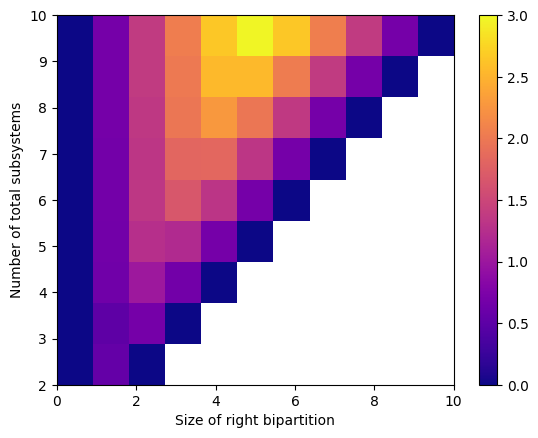

In [8]:
plt.imshow(
    entropy,
    origin="lower",
    extent=[0, 10, 2, 10],
    cmap="plasma",
    aspect="auto"
)
plt.xlabel("Size of right bipartition")
plt.ylabel("Number of total subsystems")
plt.colorbar()
plt.clim([0, 3])
plt.savefig(f"{plot_dir}{os.sep}entropy_heat_map.pdf", format="pdf", bbox_inches="tight")

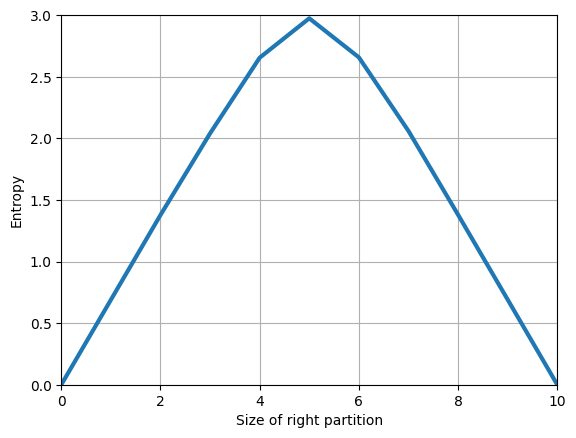

In [9]:
plt.plot(entropy[8], lw=3)
plt.xlim([0, 10])
plt.xlabel("Size of right partition")
plt.ylabel("Entropy")
plt.grid()
plt.ylim([0, 3])
plt.savefig(f"{plot_dir}{os.sep}entropy_N10.pdf", format="pdf", bbox_inches="tight")